## Import Libraries
Importing necessary Python libraries for data manipulation, visualization, and display.

In [9]:
# Import libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib import colormaps as cm
from matplotlib import colors

## Load Well Data
Reading production well data from a CSV file and displaying it.

In [10]:
# Load production well data from CSV, using Well_ID as the index column
production_wells_df = pd.read_csv('res21_2D_wells.csv', 
                                  index_col='Well_ID')
# Display the dataframe to verify data was loaded correctly
production_wells_df 

# Commented out for future use if needed
#preproduction_wells_df = pd.read_csv('', #index_col='Well_ID')

,X,Y,Por,Perm,AI,Density,PVel,Youngs,SVel,Shear,CumulativeOil
Well_ID,,,,,,,,,,,
1,7325.0,7175.0,13.564033,NaN,7.214987,2.153530,3379.255305,25.875998,1658.612455,NaN,847.33
2,4225.0,3525.0,12.907730,133.910637,7.308846,2.146360,3563.549461,25.688560,1673.770439,6.429229,1201.20
3,7725.0,8275.0,12.110566,104.059282,7.366451,1.919698,3882.442911,NaN,1675.645601,5.674798,781.40
4,4425.0,6475.0,13.990654,139.915993,7.286771,1.980721,3688.351168,27.125611,NaN,5.408664,1573.20
5,2125.0,1225.0,12.982720,NaN,7.333877,1.928716,3777.566423,28.133694,NaN,5.265054,548.68
...,...,...,...,...,...,...,...,...,...,...,...
69,3375.0,775.0,12.323650,105.228380,7.391037,1.903947,4039.819037,29.487929,1677.211387,NaN,1320.10
70,3575.0,9775.0,13.532038,149.422149,7.303712,2.278235,3264.919661,NaN,1681.926637,6.714150,1022.10
71,6975.0,6525.0,13.534951,125.424280,7.223278,2.069715,3637.282621,NaN,1656.076815,5.650985,998.59


## Extract Well Locations
Extracting just the X and Y coordinates of the production wells for plotting.

In [11]:
# Extract only the X and Y columns for spatial plotting
production_well_locations = production_wells_df[['X', 'Y']]
# Display the coordinates to verify extraction
production_well_locations  

,X,Y
Well_ID,,
1,7325.0,7175.0
2,4225.0,3525.0
3,7725.0,8275.0
4,4425.0,6475.0
5,2125.0,1225.0
...,...,...
69,3375.0,775.0
70,3575.0,9775.0
71,6975.0,6525.0


## Load Acoustic Impedance (AI) Map
Loading the acoustic impedance data from a NumPy file.

In [12]:
# Load the acoustic impedance map from a NumPy file
ai = np.load('res21_ai_map.npy')
# Display the array to verify loading
ai

array([[7330745.12202422, 7331760.53488938, 7334060.40454262, ...,
        7497094.21929584, 7497790.23583703, 7498039.48550125],
       [7333197.5232591 , 7336590.44627886, 7340141.09219594, ...,
        7492364.35635126, 7493427.2356891 , 7491384.0372257 ],
       [7339554.15399274, 7339822.34125162, 7346433.56267525, ...,
        7490250.82347288, 7490639.03251509, 7489313.08234804],
       ...,
       [7339324.42321982, 7338370.27392434, 7337808.91653805, ...,
        7479945.20093714, 7480506.61698691, 7480261.31217404],
       [7337509.51722756, 7335284.93613764, 7334043.33226672, ...,
        7482532.65559477, 7482650.45830715, 7481127.24688628],
       [7334441.44000326, 7334579.45702932, 7332046.40679101, ...,
        7484917.88347116, 7484380.25223172, 7484013.64450351]])

## Create Base Map Visualization
Creating a figure with the acoustic impedance map as a background and adding a colorbar.

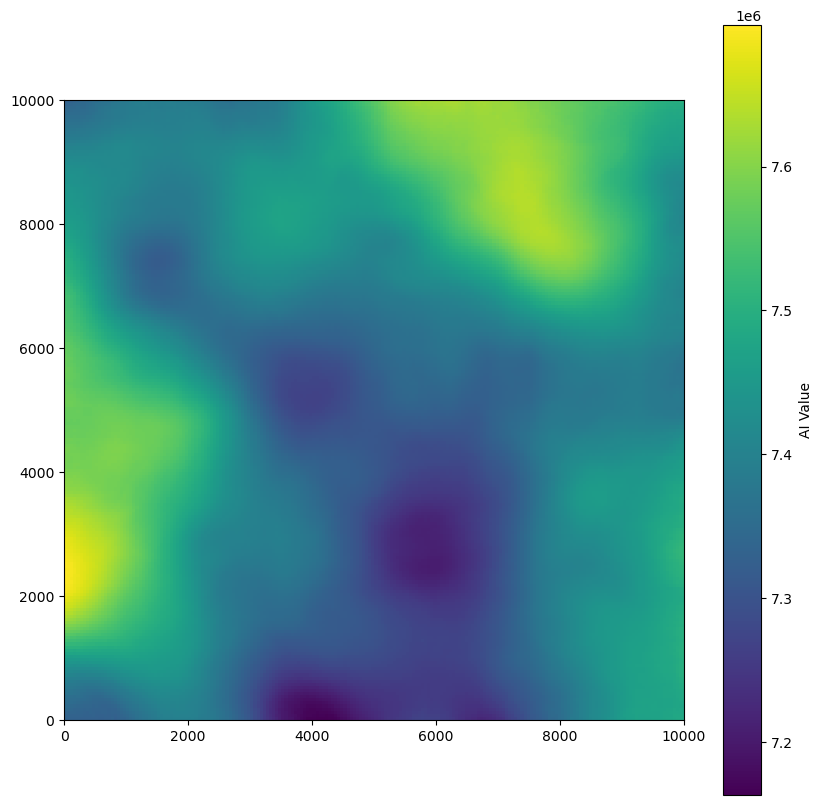

In [13]:
# Create a figure and axis for plotting with specified size
fig, ax = plt.subplots(figsize=(10, 10))

# Create a proper normalization for the data range
vmin, vmax = ai.min(), ai.max()  # Get actual min and max values from the data
norm = colors.Normalize(vmin=vmin, vmax=vmax)

# Plot the AI map as an image with specified colormap and dimensions
# The extent parameter maps the array indices to spatial coordinates (0-10000 meters)
im = ax.imshow(ai, cmap='viridis', extent=(0, 10000, 0, 10000), norm=norm)

# Add a colorbar to show the mapping between colors and AI values
cbar = fig.colorbar(im)
cbar.set_label('AI Value')  # Add a descriptive label to the colorbar

## Prepare Well Coordinates for Plotting
Converting well coordinates from the dataframe to NumPy arrays and adjusting the Y-coordinates to match the map orientation.

In [14]:
# Convert X coordinates to NumPy array for plotting
px = production_well_locations['X'].to_numpy()

# Convert Y coordinates and flip them (since image Y-axis is inverted)
# The 10000 is added to maintain the correct position in the 10000x10000 grid
py = -production_well_locations['Y'].to_numpy() + 10000

## Verify Y-Coordinate Transformation
Displaying the transformed Y-coordinates to verify the transformation is correct.

In [15]:
# Display the transformed Y-coordinates to verify they're in the correct range
py

array([2825., 6475., 1725., 3525., 8775., 5475., 1975., 1325., 4525.,
       8425., 4325., 6225., 1125., 1775., 4125.,  525., 3725., 7625.,
       3075., 7825., 2875., 4875., 1375., 2375., 8625., 4275., 5225.,
       3325., 8175., 3125., 6175., 2175., 4075., 5825., 7225., 2625.,
       1575., 7925., 5175., 6625., 1675., 2625.,  575., 4025., 6875.,
       1175., 3075., 3275., 4425., 6375., 9025.,  775., 3875., 5625.,
       2375., 1475., 4875., 3025., 6675., 3675., 5375., 7225., 1875.,
       1175., 3475., 4625., 2075., 5575., 9225.,  225., 3475., 7375.,
       2475.])

## Plot Well Locations on the Map
Adding the production well locations as scatter points on the acoustic impedance map and displaying the final figure.

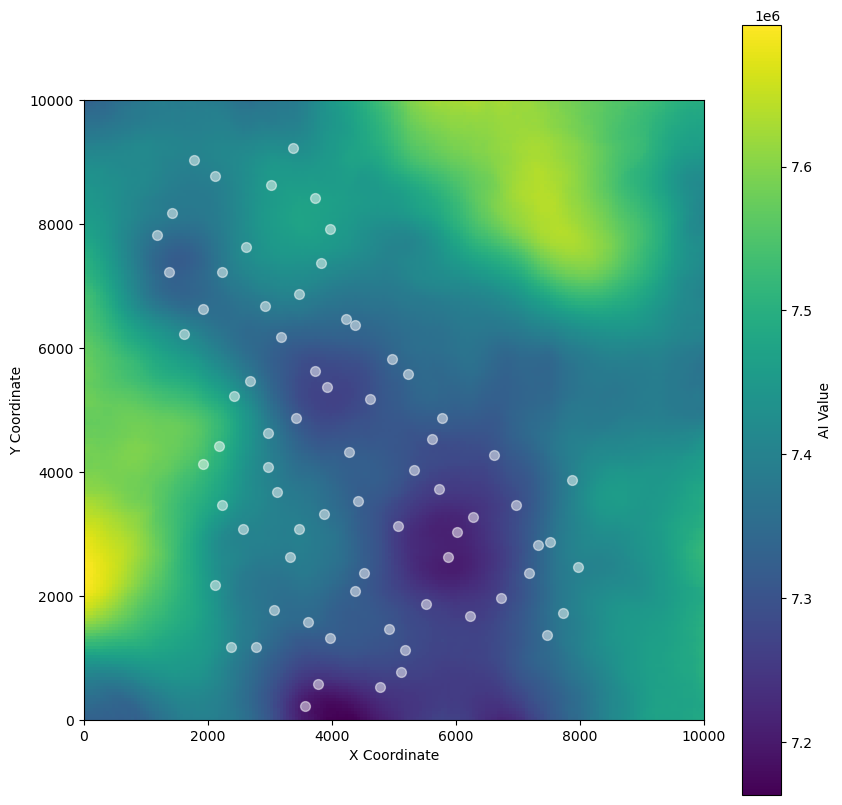

In [16]:
# Add production well locations as white circles on the map
# - alpha=0.5 makes the points semi-transparent
# - s=50 sets the point size
ax.scatter(px, py, color='w', marker='o', alpha=0.5, s=50)

# Add axis labels for clarity
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

# Display the complete figure with wells overlaid on the AI map
display(fig)

## Exercise:  Add the "test" wells to the map

Use black for the marker color to distinguish between the two well sets.